# 비지도학습 Unsupervised learning

입력값으로부터 데이터의 특징을 찾아내는 학습방법으로 대표적으로 오토인코더가 있다.

## 오토인코더 Autoencoder

- 입력값과 출력값을 같게 하는 신경망
- 가운데 계층의 노드 수가 입력값보다 적은 것이 특징
- 데이터 압축 효과, 노이즈 제거 효과

## 오토인코더 동작 원리

- 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 보냄
- 은닉층의 데이터를 디코더를 통해 출력층으로 보냄
- 출력갑과 입력값이 같아지도록 weight & bias 업데이트

## 오토인코더 종류
- 변이형 오토인코더 Variational Autoencoder
- 잡음제거 오토인코더 Denoising Autoencoder


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

/Users/yeomyeongwoo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 하이퍼 파라미터 따로 빼기

learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28 # n_input > n_hidden

In [9]:
# 인코더 부분
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
print(encoder)

Tensor("Sigmoid_1:0", shape=(?, 256), dtype=float32)


sigmoid를 왜 쓰는가?
relu로 하면 학습이 안됨...

In [10]:
# 디코더 부분

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))
print(decoder)

Tensor("Sigmoid_2:0", shape=(?, 784), dtype=float32)


In [11]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
    
    epoch_str = '{:04d}'.format(epoch+1)
    average_cost = '{:.4f}'.format(total_cost / total_batch)
    print(f'Epoch: {epoch_str} Avg. cost = {average_cost}')

Epoch: 0001 Avg. cost = 0.0617
Epoch: 0002 Avg. cost = 0.0364
Epoch: 0003 Avg. cost = 0.0321
Epoch: 0004 Avg. cost = 0.0300
Epoch: 0005 Avg. cost = 0.0286
Epoch: 0006 Avg. cost = 0.0279
Epoch: 0007 Avg. cost = 0.0271
Epoch: 0008 Avg. cost = 0.0262
Epoch: 0009 Avg. cost = 0.0256
Epoch: 0010 Avg. cost = 0.0253
Epoch: 0011 Avg. cost = 0.0252
Epoch: 0012 Avg. cost = 0.0250
Epoch: 0013 Avg. cost = 0.0249
Epoch: 0014 Avg. cost = 0.0247
Epoch: 0015 Avg. cost = 0.0247
Epoch: 0016 Avg. cost = 0.0246
Epoch: 0017 Avg. cost = 0.0245
Epoch: 0018 Avg. cost = 0.0245
Epoch: 0019 Avg. cost = 0.0244
Epoch: 0020 Avg. cost = 0.0244


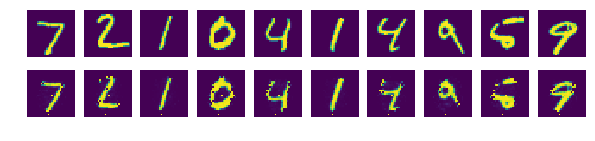

In [13]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()